In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('cancer_data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


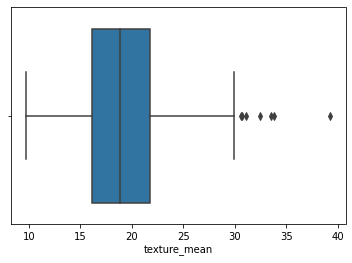

In [6]:
sns.boxplot(data['texture_mean'])

In [7]:
#data2=data['diagnosis'].replace(('M', 'B'), (1, 0), inplace=True)
#data2
data2=data['diagnosis'].replace(('M', 'B'), (1, 0 ), inplace=True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
for i in data['diagnosis']:
    if i=='M':
        i=1, 
    else:
        i=0
print (data['diagnosis'])


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [9]:
sel_ind = data.corr()['diagnosis']
sel_ind

id                         0.039769
diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0

TypeError: 'AxesSubplot' object is not subscriptable

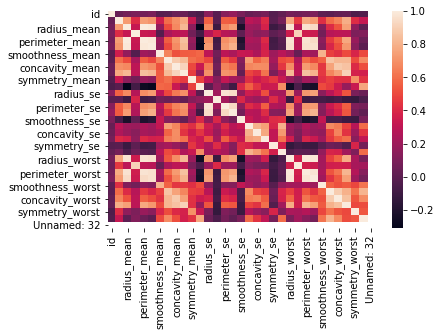

In [10]:
corr=data.corr()
sns.heatmap(corr)['diagnosis']

In [11]:
sel=data.corr()['diagnosis']>0.7
sel

id                         False
diagnosis                   True
radius_mean                 True
texture_mean               False
perimeter_mean              True
area_mean                   True
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                  True
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst        True
symmetry_w

In [12]:
y = data['diagnosis']
print('Selected features', sel[sel== True])
print ('\n\n')
X = data[list(sel.index[sel])]
print (X)

Selected features diagnosis               True
radius_mean             True
perimeter_mean          True
area_mean               True
concave points_mean     True
radius_worst            True
perimeter_worst         True
area_worst              True
concave points_worst    True
Name: diagnosis, dtype: bool



     diagnosis  radius_mean  perimeter_mean  area_mean  concave points_mean  \
0            1        17.99          122.80     1001.0              0.14710   
1            1        20.57          132.90     1326.0              0.07017   
2            1        19.69          130.00     1203.0              0.12790   
3            1        11.42           77.58      386.1              0.10520   
4            1        20.29          135.10     1297.0              0.10430   
..         ...          ...             ...        ...                  ...   
564          1        21.56          142.00     1479.0              0.13890   
565          1        20.13          131.20     1261.0   

In [13]:
X = X.drop('diagnosis', axis=1)
print (X.shape)

(569, 8)


## Data splitting into train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [15]:
y_train

567    1
295    0
91     1
1      1
94     1
      ..
369    1
320    0
527    0
125    0
265    1
Name: diagnosis, Length: 455, dtype: int64

## K-NN Algorithm

In [16]:
clf = KNeighborsClassifier(n_neighbors=1) 
clf.fit(X_train, y_train)  
print('1 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=2) 
clf.fit(X_train, y_train)  
print('2 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train, y_train)  
print('3 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=4) 
clf.fit(X_train, y_train)  
print('4 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X_train, y_train)  
print('8 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=11) 
clf.fit(X_train, y_train)  
print('11 neighbors', clf.score(X_test, y_test))

clf = KNeighborsClassifier(n_neighbors=15) 
clf.fit(X_train, y_train)  
print('15 neighbors', clf.score(X_test, y_test))


1 neighbors 0.9298245614035088
2 neighbors 0.9122807017543859
3 neighbors 0.9210526315789473
4 neighbors 0.9210526315789473
8 neighbors 0.9210526315789473
11 neighbors 0.9210526315789473
15 neighbors 0.9210526315789473


In [17]:
clf.kneighbors

<bound method KNeighborsMixin.kneighbors of KNeighborsClassifier(n_neighbors=15)>

In [18]:
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [19]:
X_test


,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
172,15.460,102.50,736.9,0.10970,18.790,125.00,1102.0,0.18270
553,9.333,59.01,264.0,0.01282,9.845,62.86,295.8,0.02564
374,13.690,87.84,579.1,0.02031,14.840,99.16,670.6,0.06987
370,16.350,109.00,840.4,0.08773,19.380,129.30,1165.0,0.22480
419,11.160,70.95,380.3,0.01076,12.360,79.26,458.0,0.04306
...,...,...,...,...,...,...,...,...
188,11.810,75.27,428.9,0.01553,12.570,79.57,489.5,0.04306
429,12.720,80.98,501.3,0.01835,13.820,88.87,586.8,0.03612
399,11.800,75.26,431.9,0.01638,13.450,86.00,562.0,0.05356
323,20.340,135.90,1264.0,0.15040,25.300,171.10,1938.0,0.26850


In [20]:
pred=clf.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [21]:
df=pd.DataFrame({'real':y_test, 'predicted':pred})
df

,real,predicted
172,1,1
553,0,0
374,0,0
370,1,1
419,0,0
...,...,...
188,0,0
429,0,0
399,0,0
323,1,1


In [22]:
#Real world
pred1=clf.predict([[15.660, 102.56, 737.1, 0.110,18.799, 125.012, 1103.2, 0.18233], [9.333, 59.01, 264.0, 0.01284, 9.941, 63.16, 296.2, 0.02743]])
pred1

array([1, 0], dtype=int64)

In [23]:
X_test.head()


,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
172,15.460,102.50,736.9,0.10970,18.790,125.00,1102.0,0.18270
553,9.333,59.01,264.0,0.01282,9.845,62.86,295.8,0.02564
374,13.690,87.84,579.1,0.02031,14.840,99.16,670.6,0.06987
370,16.350,109.00,840.4,0.08773,19.380,129.30,1165.0,0.22480
419,11.160,70.95,380.3,0.01076,12.360,79.26,458.0,0.04306


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.9210526315789473